In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/keroy/Downloads/data science-20220510T114140Z-001/data science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_Housing_Data.csv")

In [3]:
# start off with high level data exploration - e.g. .info(), .describe(), .corr()
# this can also include reading the data dictionary 

# for this data set, the label / variable we are trying to predict is sale price
# we can begin by spotting outliers in terms of sale price

In [4]:
#df.info()

In [5]:
with open("C:/Users/keroy/Downloads/data science-20220510T114140Z-001/data science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_Housing_Feature_Description.txt", "r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

<AxesSubplot:xlabel='SalePrice'>

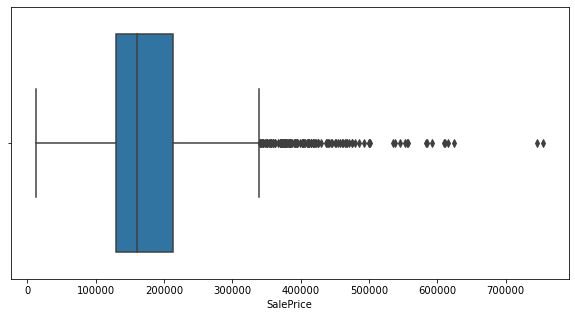

In [6]:
# using box plot to spot outliers

plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='SalePrice')

In [7]:
# before using scatter plot to spot outliers, we want to find out the highest corr label / variable
# this is to spot data points that deviate far from the norm

df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

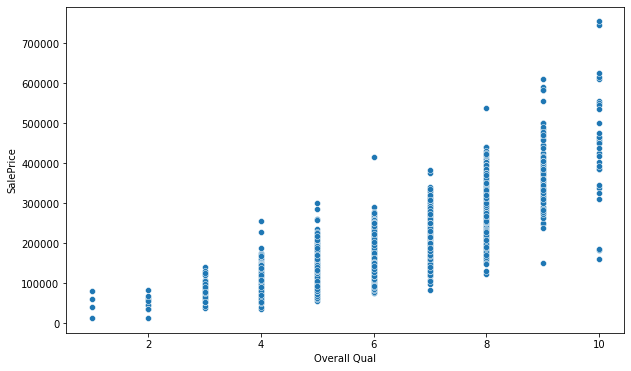

In [8]:
# using scatter plot to spot outliers

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Overall Qual', y='SalePrice')

In [9]:
# based on the scatter plot, there are three data points that seem to deviate far from norm
# those were the data points with 9 and 10 overall qual scoring but a low sale price
# next, let's see if the variable 'Gr Liv Area' also produces the same outlier points as 'Overall Qual'

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

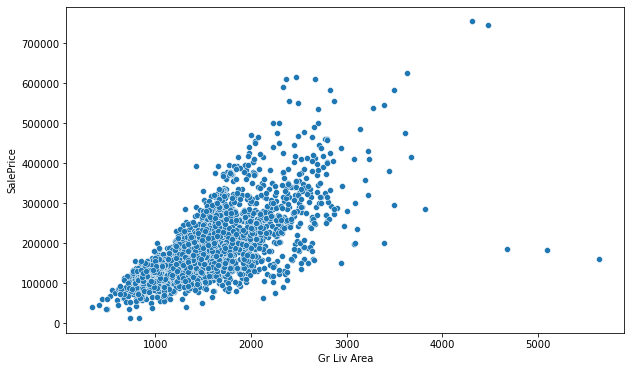

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')

In [11]:
# data points that deviate from norm in 'Overall Qual' scatter plot

df[(df['Overall Qual'] > 8) & (df['SalePrice'] <= 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [12]:
# data points that deviate from norm in 'Gr Liv Area' scatter plot

df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] <= 200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [13]:
# based on the result, data points with index 1498, 2180 and 2181 seems like outliers

In [14]:
df2 = pd.read_csv("C:/Users/keroy/Downloads/data science-20220510T114140Z-001/data science/UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_outliers_removed.csv")

In [15]:
# no. of rows in original data set

len(df)

2930

In [16]:
# no. of rows in data set which has outliers removed

len(df2)

2927

In [17]:
# find out which column has null data 

df2.isnull().sum()

PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 81, dtype: int64

In [18]:
s = df2.isnull().sum()
s = s[s != 0]
s.sort_values()

Electrical           1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Garage Cars          1
Bsmt Full Bath       2
Bsmt Half Bath       2
Mas Vnr Area        23
Mas Vnr Type        23
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Finish      159
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Lot Frontage       490
Fireplace Qu      1422
Fence             2355
Alley             2729
Misc Feature      2822
Pool QC           2915
dtype: int64

In [19]:
# there are 27 labels / variables that contains null values

len(s)

27

In [20]:
# defining a function that turns the number of null values to a %

def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [21]:
percent_nan = percent_missing(df2)

In [22]:
percent_nan

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

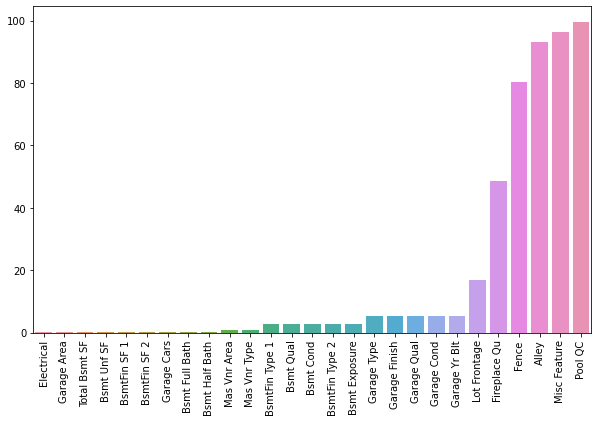

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

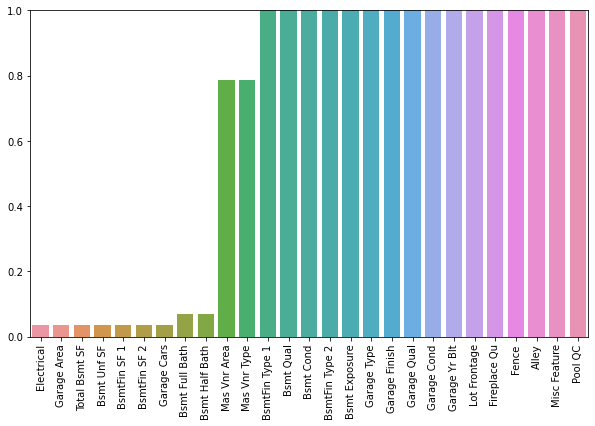

In [24]:
# to look at those labels / variables that have less than 1% 

plt.figure(figsize=(10,6))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0,1);

In [25]:
df2[df2['Electrical'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1576,916386080,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


In [26]:
df2['MS Zoning'].value_counts()

RL         2270
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64

In [27]:
# looking at the MS Zoning, most houses in the RL zoning has an electrical config of SBrkr
# hence, we will use the value 'SBrkr' to fill in the null value

df2[df2['MS Zoning'] == 'RL']['Electrical'].value_counts()

SBrkr    2128
FuseA     107
FuseF      31
FuseP       3
Name: Electrical, dtype: int64

In [28]:
# as there is only one row with null as a value for 'Electrical', we don't need to specify the iloc / loc to identify the row

df2['Electrical'].fillna('SBrkr')

0       SBrkr
1       SBrkr
2       SBrkr
3       SBrkr
4       SBrkr
        ...  
2922    SBrkr
2923    SBrkr
2924    SBrkr
2925    SBrkr
2926    SBrkr
Name: Electrical, Length: 2927, dtype: object

In [29]:
# to fill up the row with a missing value for the label / variable 'Garage Area'
# we need to first understand the other related specs of the data point

df2[df2['Garage Area'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [30]:
df2[df2['Garage Area'].isnull()]['Garage Type']

2233    Detchd
Name: Garage Type, dtype: object

In [31]:
df2[(df2['MS SubClass'] == 70) & (df2['MS Zoning'] == 'RM')].groupby('Garage Type').mean()['Garage Area']

Garage Type
2Types    779.000000
Attchd    333.111111
Detchd    429.106383
Name: Garage Area, dtype: float64

In [32]:
# evaluating the median to ensure that the mean is not influenced by left or right tailed data

df2[(df2['MS SubClass'] == 70) & (df2['MS Zoning'] == 'RM')].groupby('Garage Type').median()['Garage Area']

Garage Type
2Types    779.0
Attchd    330.0
Detchd    400.0
Name: Garage Area, dtype: float64

In [33]:
# as there is only one row with null as a value for 'Garage Area', we don't need to specify the iloc / loc to identify the row

df2['Garage Area'].fillna(round(df2[(df2['MS SubClass'] == 70) & (df2['MS Zoning'] == 'RM')].groupby('Garage Type').mean()['Garage Area']['Detchd']))

0       528.0
1       730.0
2       312.0
3       522.0
4       482.0
        ...  
2922    588.0
2923    484.0
2924      0.0
2925    418.0
2926    650.0
Name: Garage Area, Length: 2927, dtype: float64

In [34]:
# this data point is the same data point as the one with a null value for 'Garage Area'

df2[df2['Garage Cars'].isnull()]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2233,910201180,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [35]:
# based on other data points with similar specs, the number of car(s) it can hold is one car

df2[(df2['MS SubClass'] == 70) & (df2['MS Zoning'] == 'RM') & (df2['Garage Type'] == 'Detchd') & (df2['Garage Area']>400) & (df2['Garage Area']<450)]['Garage Cars'].value_counts()

1.0    1
Name: Garage Cars, dtype: int64

In [36]:
df2['Garage Cars'].fillna(1)

0       2.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
2922    2.0
2923    2.0
2924    0.0
2925    2.0
2926    3.0
Name: Garage Cars, Length: 2927, dtype: float64

In [37]:
# to verify if the data point for 'Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 1' and 'BsmtFin SF 2' are the same
# if they are the same, it suggests that the data point does not have a basement to begin with

data_index_of_bsmt_null_values1 = []
checklist = ['Total Bsmt SF', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2']

for i in checklist:
    data_index_of_bsmt_null_values1.append(df2[df2[i].isnull()].index)

data_index_of_bsmt_null_values1

[Int64Index([1341], dtype='int64'),
 Int64Index([1341], dtype='int64'),
 Int64Index([1341], dtype='int64'),
 Int64Index([1341], dtype='int64')]

In [38]:
# to verify if the data point for 'Bsmt Full Bath' and 'Bsmt Half Bath' are the same

data_index_of_bsmt_null_values2 = []
checklist = ['Bsmt Full Bath', 'Bsmt Half Bath']

for i in checklist:
    data_index_of_bsmt_null_values2.append(df2[df2[i].isnull()].index)

data_index_of_bsmt_null_values2

[Int64Index([1341, 1497], dtype='int64'),
 Int64Index([1341, 1497], dtype='int64')]

In [39]:
# to verify if the data point for 'BsmtFin Type 1', 'Bsmt Qual', and 'Bsmt Cond' are the same

data_index_of_bsmt_null_values3 = []
checklist = ['BsmtFin Type 1', 'Bsmt Qual', 'Bsmt Cond']

for i in checklist:
    data_index_of_bsmt_null_values3.append(df2[df2[i].isnull()].index)

data_index_of_bsmt_null_values3

[Int64Index([  83,  154,  206,  243,  273,  275,  290,  551,  649,  676,  678,
              708,  780,  786,  787,  794,  806,  807,  809,  810,  811,  812,
              814,  884,  887,  896,  898,  945,  952,  970, 1204, 1219, 1251,
             1254, 1259, 1268, 1325, 1341, 1343, 1374, 1497, 1499, 1500, 1502,
             1505, 1552, 1567, 1816, 1878, 1885, 1897, 1900, 1967, 2002, 2003,
             2069, 2080, 2087, 2175, 2181, 2209, 2238, 2275, 2334, 2484, 2613,
             2618, 2619, 2621, 2622, 2623, 2676, 2697, 2699, 2703, 2736, 2741,
             2876, 2889, 2900],
            dtype='int64'),
 Int64Index([  83,  154,  206,  243,  273,  275,  290,  551,  649,  676,  678,
              708,  780,  786,  787,  794,  806,  807,  809,  810,  811,  812,
              814,  884,  887,  896,  898,  945,  952,  970, 1204, 1219, 1251,
             1254, 1259, 1268, 1325, 1341, 1343, 1374, 1497, 1499, 1500, 1502,
             1505, 1552, 1567, 1816, 1878, 1885, 1897, 1900, 1967, 2002

In [40]:
# it is evident from the results above that the data points with index 1341 and 1497 likely has no basement 

In [41]:
# as the labels / variables : 'Fence', 'Alley', 'Misc Feature' and 'Pool QC'
# have too many null values, they should be dropped from the data set

df2.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis=1)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,923275080,80,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2923,923276100,20,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2924,923400125,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2925,924100070,20,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [49]:
# to convert the label / variable 'MS SubClass' from int into str
# this is because it is the only label / variable with a numerical category that is not ordinal

df2['MS SubClass'] = df2['MS SubClass'].transform(str)
df2['MS SubClass'].dtype

dtype('O')

In [53]:
df2_obj = df2.select_dtypes(include='object')

In [52]:
df2_num = df2.select_dtypes(exclude='object')

In [54]:
# using the data frame created above (consisting of objects data only) to create dummy variables
# this is to work with categorical data points

df2_obj = pd.get_dummies(df2_obj, drop_first=True)

In [58]:
# putting the data frame that contains only objects data and numeric data together for machine learning

df2 = pd.merge(df2_obj, df2_num, left_index=True, right_index=True, )

In [59]:
df2

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,0,0,0,0,1,0,0,0,0,0,...,210,62,0,0,0,0,0,5,2010,215000
1,0,0,0,0,1,0,0,0,0,0,...,140,0,0,0,120,0,0,6,2010,105000
2,0,0,0,0,1,0,0,0,0,0,...,393,36,0,0,0,0,12500,6,2010,172000
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,4,2010,244000
4,0,0,0,0,0,0,0,0,0,1,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,0,0,0,0,0,0,0,0,0,0,...,120,0,0,0,0,0,0,3,2006,142500
2923,0,0,0,0,1,0,0,0,0,0,...,164,0,0,0,0,0,0,6,2006,131000
2924,0,0,0,0,0,0,0,0,0,0,...,80,32,0,0,0,0,700,7,2006,132000
2925,0,0,0,0,1,0,0,0,0,0,...,240,38,0,0,0,0,0,4,2006,170000
